In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd
import xarray as xr
import rioxarray
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cf
import regionmask
from cmcrameri import cm
shp_pan = gpd.read_file(r'Data\shapefiles\panamz.geojson')
folder_metric = r'Data\Datasets\amz\map\clim'
datasets = ['cru', 'gpcc', 'chirps','imerg', 'terra', 'era_land', 'jra55','merra2']
datasets_names = ['CRU', 'GPCC', 'CHIRPS','IMERG-V6', 'TerraClimate', 'ERA5-Land', 'JRA55','MERRA2']
stations = gpd.read_file(r'Data\Datasets\amz\map\stations.geojson')
regions = gpd.read_file(r'Data\shapefiles\ANA_amz.geojson', driver='GeoJSON')
regions_mask = regionmask.from_geopandas(regions, names='Region')


In [2]:
from matplotlib.lines import Line2D
plt.rcParams.update({'font.size': 18})
regions_list = ['Western', 'Northern', 'Southern', 'Eastern']
regions_replace = { 0:'Southern', 1:'Eastern',2:'Western', 3:'Northern'}
letters_22 = ['j)', 'k)', 'l)', 'm)']
wong = ['#882255','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7','#999999']
wong_b = ['#882255','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7','#000000']
hue_order = datasets_names.copy()
hue_order.append('Stations')
legend_elements = [Line2D([0], [0],  marker='s', color='w', label=hue_order[i], markerfacecolor=wong[i], markersize=12) for i in range(len(wong))]
legend_elements_b = [Line2D([0], [0],  marker='s', color='w', label=hue_order[i], markerfacecolor=wong_b[i], markersize=12) for i in range(len(wong_b))]


In [3]:
ds_dict = {}
for i, dataset in enumerate(datasets):
    ds = xr.open_dataset(os.path.join(folder_metric, dataset + '.nc'))
    #create mask from regions
    mask = regions_mask.mask(ds, lon_name='lon', lat_name='lat')
    ds['Region'] = mask
    ds_dict[datasets_names[i]] = ds
    

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry


In [ ]:
#create a df with all ds in ds_dict
df = pd.DataFrame()
for name in datasets_names:
    dff =  ds_dict[name].to_dataframe().dropna().reset_index(drop=True)
    dff['Dataset'] = name
    df = df.append(dff)
df = df[['pr', 'Region', 'Dataset']]
df['Region'] = df['Region'].replace(regions_replace)
df_stat = stations[['Total', 'Region']].copy()
df_stat['Dataset'] = 'Stations'
df_stat = df_stat.rename(columns={'Total':'pr'})
df = df.append(df_stat)

C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\4057524895.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\4057524895.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\4057524895.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\4057524895.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\4057524895.py:6: FutureWarning: The frame.append method is dep

In [ ]:
df_mean = df.groupby(['Region','Dataset']).mean().reset_index()
df_mean.pivot_table(index='Region',columns='Dataset', values='pr').astype(int)

Dataset,CHIRPS,CRU,ERA5-Land,GPCC,IMERG-V6,JRA55,MERRA2,Stations,TerraClimate
Region,,,,,,,,,
Eastern,2216,2217,1952,2100,2131,2098,1859,2097,2113
Northern,2495,2481,2564,2418,2465,2774,1986,2475,2387
Southern,2020,2025,2179,1926,2005,1949,1640,1863,2002
Western,2541,2453,2632,2440,2602,2313,2031,2580,2525


In [4]:
vmin = 500
vmax = 3500
levels = 7
cmap =  cm.lapaz_r#cmocean.cm.rain#mpl.cm.Blues
extend_cbar = 'both'
var = 'pr'
var_stat = 'Total'
label_cbar = 'Mean Annual Precipitation (mm/year)'


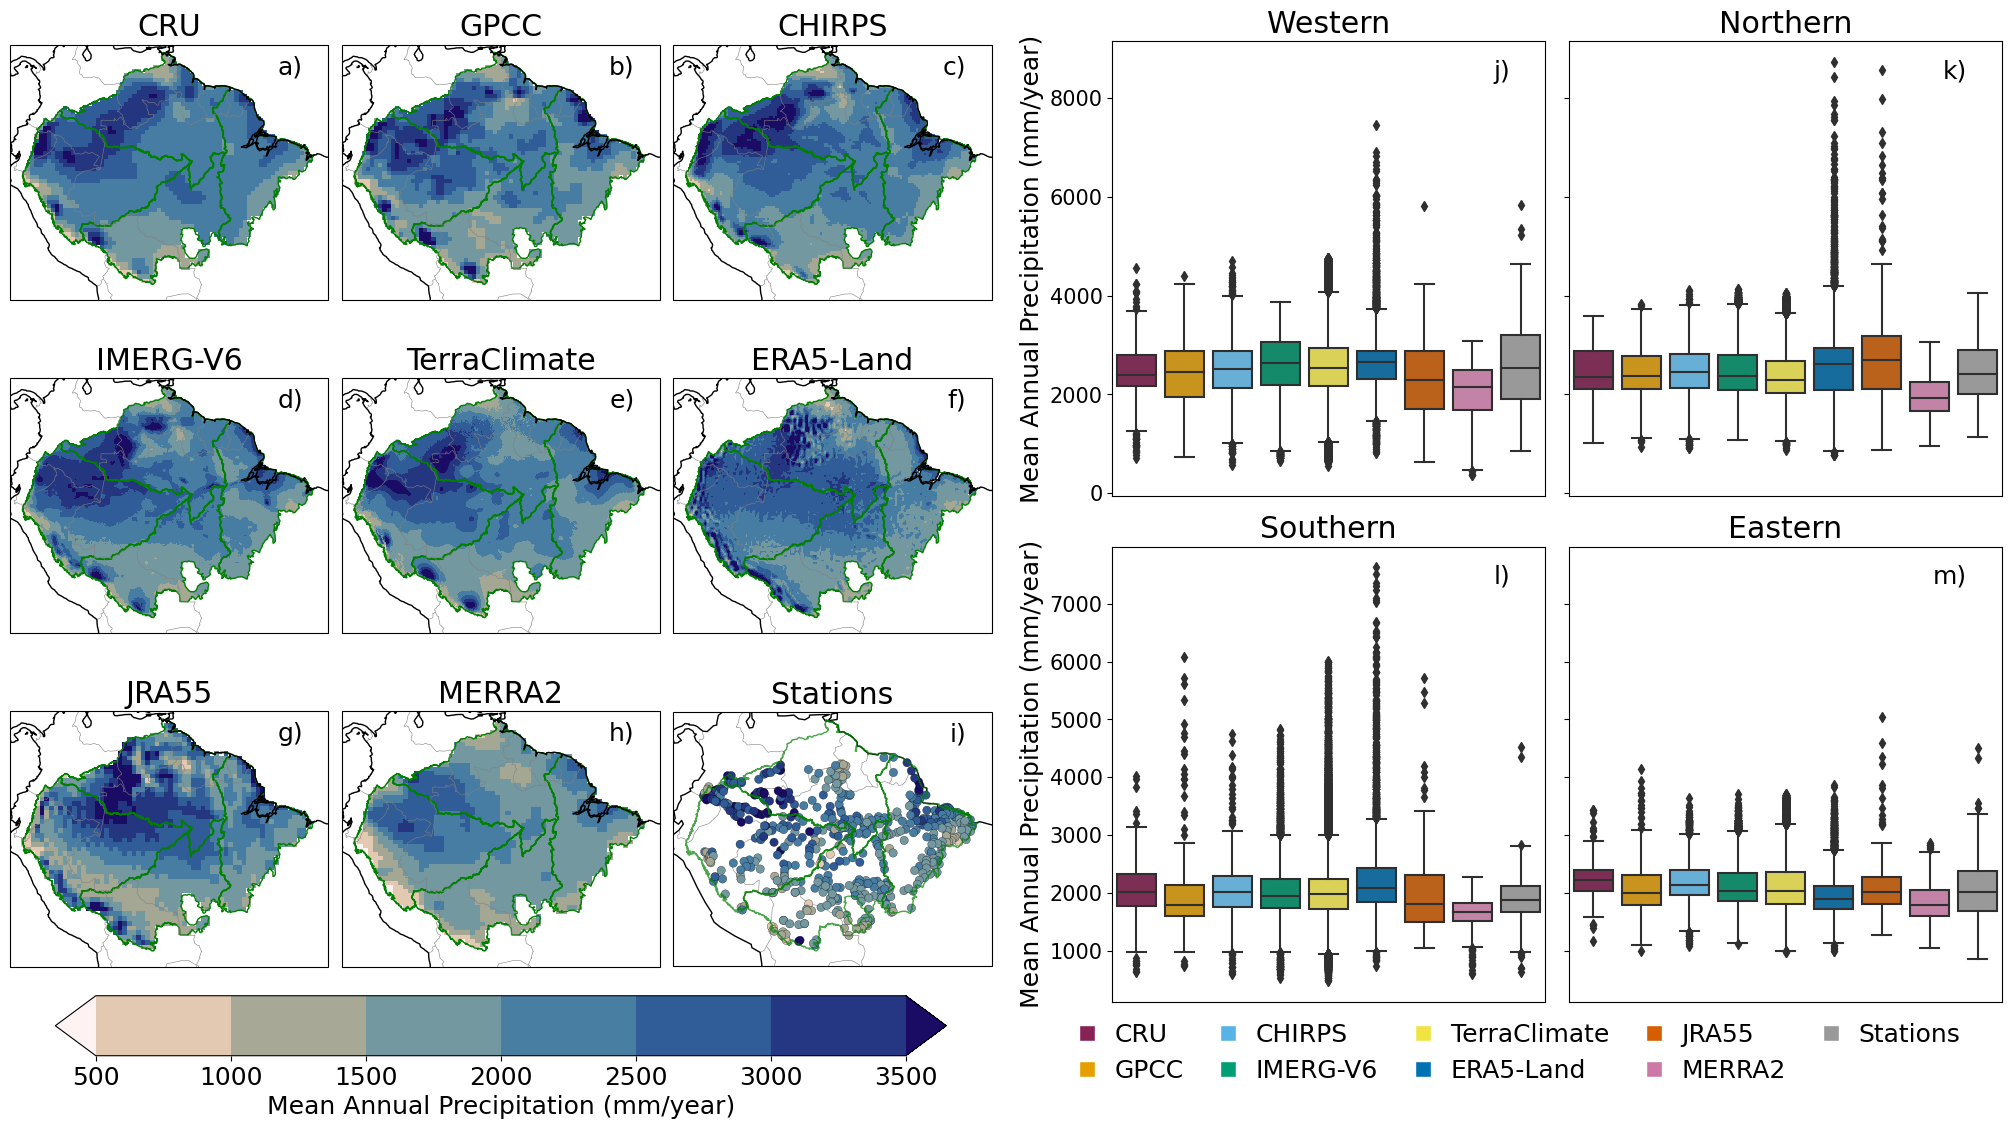

In [ ]:
from Data.utils.datasets_plotting import plot_datasets33
fig = plt.figure(layout='constrained', figsize=(20, 10))
subfigs = fig.subfigures(1, 2)
axs_right = subfigs[1].subplots(2, 2, sharex=True, sharey='row')
axs_right = axs_right.flatten()
letters_22 = ['j)', 'k)', 'l)', 'm)']
for i, region in enumerate(regions_list):
    #boxplot of df
    sns.boxplot( y='pr', data=df[df.Region==region], ax=axs_right[i], hue_order=hue_order, palette=wong, hue='Dataset',x='Dataset',dodge=False).get_legend().remove()
    axs_right[i].set_title(region)
    axs_right[i].set_xlabel('')
    axs_right[i].tick_params(axis='y', which='both', labelsize=15)
    axs_right[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    
    if i % 2 == 0:
        axs_right[i].set_ylabel(label_cbar)
    else:
        axs_right[i].set_ylabel('')

    axs_right[i].text(0.92,0.96,  letters_22[i], transform=axs_right[i].transAxes,  fontsize=18, va='top', ha='right')

plot_datasets33(subfigs[0], datasets_names, ds_dict, stations, regions, vmin, vmax, levels, cmap, extend_cbar, var, var_stat, label_cbar)
#create legend in the bottom center of the figure
subfigs[1].legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.1), loc='lower center', ncol=5, frameon=False,handletextpad=0.1,columnspacing=0.8)

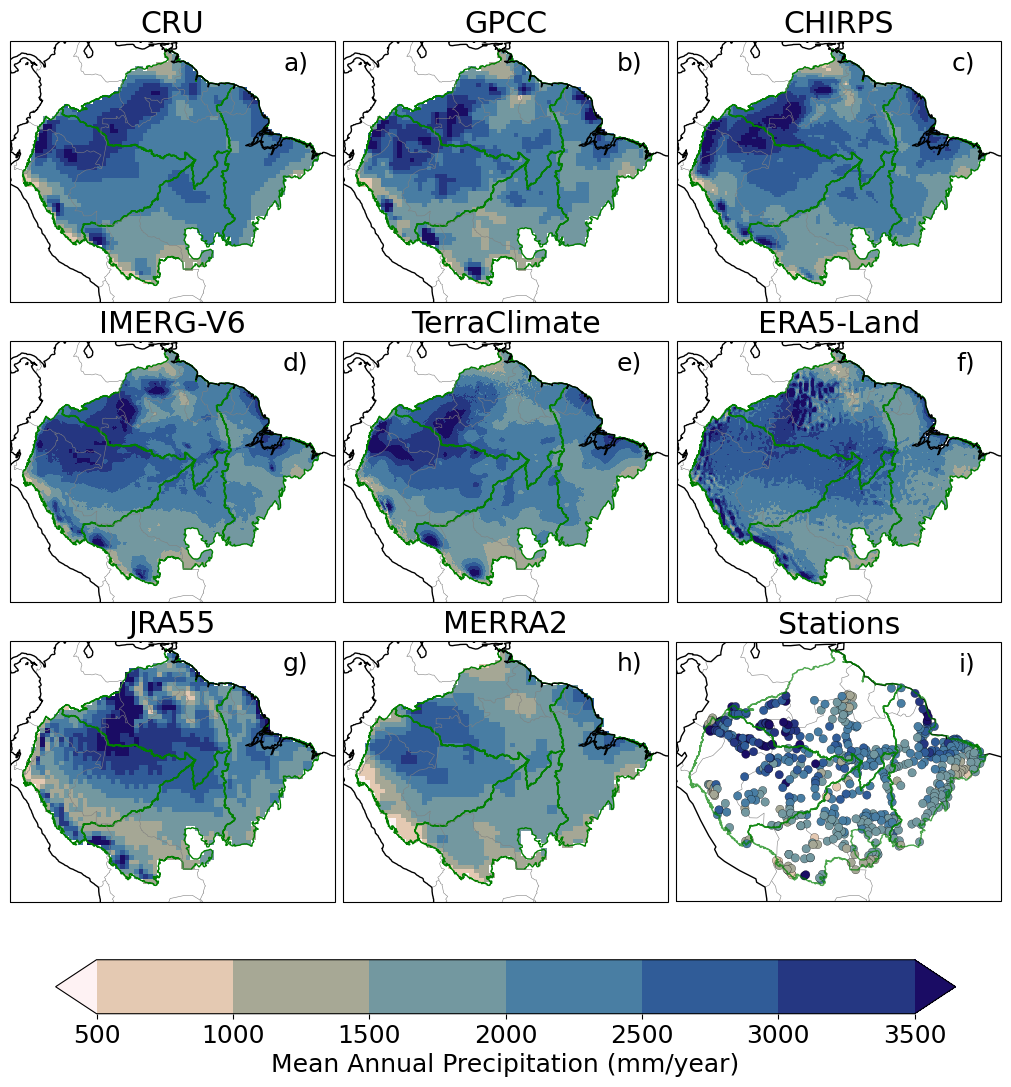

In [5]:
from Data.utils.datasets_plotting import plot_datasets33
fig = plt.figure(layout='constrained', figsize=(10, 9))
plot_datasets33(fig, datasets_names, ds_dict, stations, regions, vmin, vmax, levels, cmap, extend_cbar, var, var_stat, label_cbar)
fig.axes[-1].set_position([0.05, -0.12, 0.9, 0.06])

# pixell

In [13]:
#merge with stations to get the region
df_stat = stations.copy()
df_stat = df_stat.rename(columns={'Total':'pr'})
# Step 1: Convert GeoDataFrame to DataFrame with point coordinates, rainfall values, and timestamps
data = df_stat[['geometry',  'pr']].copy()
data['lon'] = data['geometry'].apply(lambda p: p.x)
data['lat'] = data['geometry'].apply(lambda p: p.y)
data = data.drop(columns=['geometry'])
var = 'pr'

In [14]:
pixel_dict = {}

for name in datasets_names:
    ds = ds_dict[name].copy()

    # Step 2: Assign each point to the grid cells of the 'ds' DataArray
    ds_grid_lon, ds_grid_lat = ds.lon.values, ds.lat.values

    data['lon_bin'] = np.digitize(data['lon'], ds_grid_lon)
    data['lat_bin'] = np.digitize(data['lat'], ds_grid_lat)

    # Step 3: Compute the mean value for each grid cell and each year
    grid_cells = data.groupby([ 'lat_bin', 'lon_bin'])[var].mean().reset_index()

    # Step 4: Create an empty DataArray with NaN values
    empty_grid = np.full((len(ds_grid_lat), len(ds_grid_lon)), np.nan)

    # Step 5: Fill the DataArray with the computed mean values for each year
    for _, row in grid_cells.iterrows():
        #year_idx = np.where(data['year'].unique() == row['year'])[0][0]
        lat_idx, lon_idx = row['lat_bin'], row['lon_bin']
        lat_idx, lon_idx = int(lat_idx), int(lon_idx)

        empty_grid[lat_idx - 1, lon_idx - 1] = row[var]

    # Step 6: Create an xarray DataArray from the result with the year dimension
    #year_coords = data['year'].unique()
    data_array = xr.DataArray(empty_grid,
                                dims=('lat', 'lon'),
                                coords={'lat': ds_grid_lat, 'lon': ds_grid_lon})
    
    #data_array = data_array.to_dataset(name=var)
    #data_array['Region'] = ds['Region']
    ds['stat'] = data_array
    pixel_dict[name] = ds.where(ds.stat>= 0)


In [48]:
#create a df_p with all ds in ds_dict
df_p = pd.DataFrame()
for name in datasets_names:
    df_pf =  pixel_dict[name].to_dataframe().dropna().reset_index(drop=True)
    df_pf['Dataset'] = name
    df_p = df_p.append(df_pf)
df_p = df_p[['pr', 'Region', 'Dataset']]
df_p['Region'] = df_p['Region'].replace(regions_replace)
df_p_stat = stations[['Total', 'Region']].copy()
df_p_stat['Dataset'] = 'Stations'
df_p_stat = df_p_stat.rename(columns={'Total':'pr'})
df_p = df_p.append(df_p_stat)

C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\637616759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_pf)
C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\637616759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_pf)
C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\637616759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_pf)
C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\637616759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_pf)
C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\637616759.py:6: FutureWarning: The frame.a

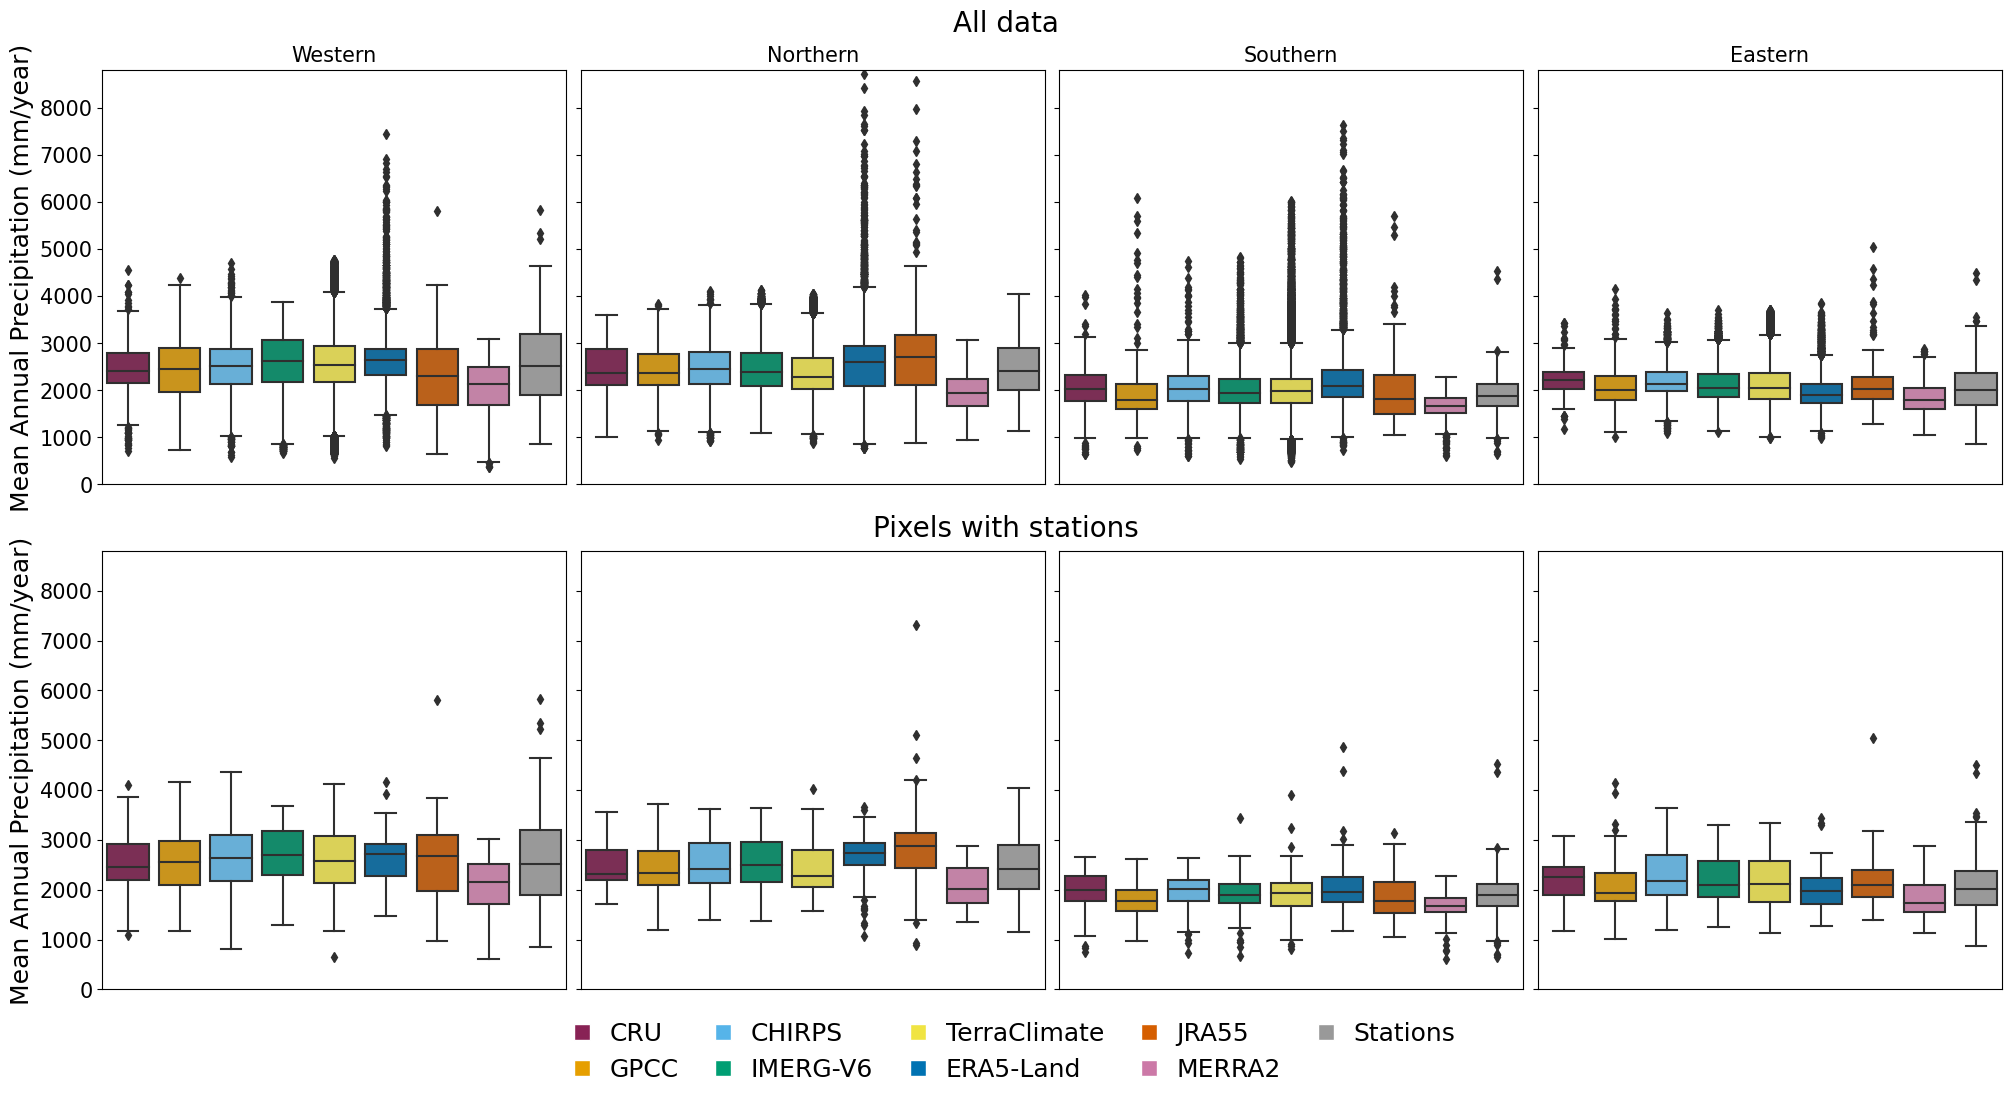

In [32]:
#plot df and df_p for each region

fig = plt.figure(layout='constrained', figsize=(20, 10))
subfigs = fig.subfigures(2, 1)
for i, dff in enumerate([df,df_p]):
    axs = subfigs[i].subplots(1, 4, sharex=True, sharey='row')
    axs = axs.flatten()
    for j, region in enumerate(regions_list):
        sns.boxplot( y='pr', data=dff[dff.Region==region], ax=axs[j], hue_order=hue_order, palette=wong, hue='Dataset',x='Dataset',dodge=False).get_legend().remove()
        
        axs[j].set_xlabel('')
        axs[j].tick_params(axis='y', which='both', labelsize=15)
        axs[j].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)

        axs[j].set_ylabel('')
        axs[j].set_ylim(0,8800)
        if i == 0:
            axs[j].set_title(region, fontsize=15)
    axs[0].set_ylabel(label_cbar)

subfigs[0].suptitle('All data', fontsize=20)
subfigs[1].suptitle('Pixels with stations', fontsize=20)

subfigs[1].legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=5, frameon=False,handletextpad=0.1,columnspacing=0.8)
#plt.tight_layout()

# tests

In [39]:
#same as above, but for KS test
from scipy.stats import ks_2samp
print('not equal')
for region in regions_list:
    df_region = df_p[df_p.Region==region]
    for dataset in datasets_names:
        df_dataset = df_region[df_region.Dataset==dataset]
        df_stations = df_region[df_region.Dataset=='Stations']
        stat, p = ks_2samp(df_dataset.pr, df_stations.pr)
        if p <= 0.05:
            print(region, dataset,  p.round(4))
        #print(len(df_dataset), len(df_stations))

not equal
Western CRU 0.0085
Western IMERG-V6 0.0163
Western ERA5-Land 0.001
Western MERRA2 0.0
Northern CRU 0.0136
Northern ERA5-Land 0.0
Northern JRA55 0.0
Northern MERRA2 0.0
Southern CRU 0.0297
Southern GPCC 0.0124
Southern CHIRPS 0.0017
Southern JRA55 0.0149
Southern MERRA2 0.0
Eastern CRU 0.0019
Eastern CHIRPS 0.0004
Eastern IMERG-V6 0.0037
Eastern TerraClimate 0.0337
Eastern ERA5-Land 0.0428
Eastern JRA55 0.0016
Eastern MERRA2 0.0004


In [50]:
#create a df with all ds in ds_dict
df_compare = pd.DataFrame()
for name in datasets_names:
    dff =  pixel_dict[name].to_dataframe().dropna().reset_index(drop=True)
    dff['Dataset'] = name
    df_compare = df_compare.append(dff)
df_compare = df_compare[['pr', 'Region', 'Dataset','stat']]
df_compare['Region'] = df_compare['Region'].replace(regions_replace)

C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\1312172248.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\1312172248.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\1312172248.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_20484\1312172248.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_2048

In [52]:
#same as above, but for wilcox
from scipy.stats import wilcoxon
for region in regions_list:
    df_region = df_compare[df_compare.Region==region]
    for dataset in datasets_names:
        df_dataset = df_region[df_region.Dataset==dataset]
        #df_stations = df_region[df_region.Dataset=='Stations']
        stat, p = wilcoxon(df_dataset.pr, df_dataset.stat)
        if p <= 0.05:
            print(region, dataset, stat, p.round(4))


Western CHIRPS 4078.0 0.0029
Western IMERG-V6 5113.0 0.0067
Western MERRA2 1183.0 0.0
Northern CHIRPS 1697.0 0.0008
Northern ERA5-Land 1875.0 0.0004
Northern JRA55 795.0 0.0
Northern MERRA2 192.0 0.0
Southern CRU 2079.0 0.0055
Southern GPCC 1856.0 0.0006
Southern CHIRPS 2359.0 0.0006
Southern ERA5-Land 2493.0 0.0001
Southern JRA55 2108.0 0.0437
Southern MERRA2 671.0 0.0
Eastern CRU 2088.0 0.0
Eastern CHIRPS 1920.0 0.0
Eastern IMERG-V6 3390.0 0.0
Eastern TerraClimate 4065.0 0.0
Eastern ERA5-Land 4436.0 0.0028
Eastern JRA55 2536.0 0.0258
Eastern MERRA2 774.0 0.0


In [102]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#transform df_p dataset column to different columns for each value

for region in regions_list:
    list_dff = []
    df_region = df_p[df_p.Region==region]
    for i, dataset in enumerate(datasets_names):
        df_dataset = df_region[df_region.Dataset==dataset]
        df_stations = df_region[df_region.Dataset=='Stations']
        list_dff.append(df_dataset[['pr']].reset_index(drop=True).rename(columns={'pr':dataset}))
    list_dff.append(df_stations[['pr']].reset_index(drop=True).rename(columns={'pr':'Stations'}))
    df_p2 = pd.concat(list_dff, axis=1)
        

In [120]:
tet = pairwise_tukeyhsd(endog=df_p['pr'], groups = df_p['Dataset'], alpha=0.05)
print(tet)

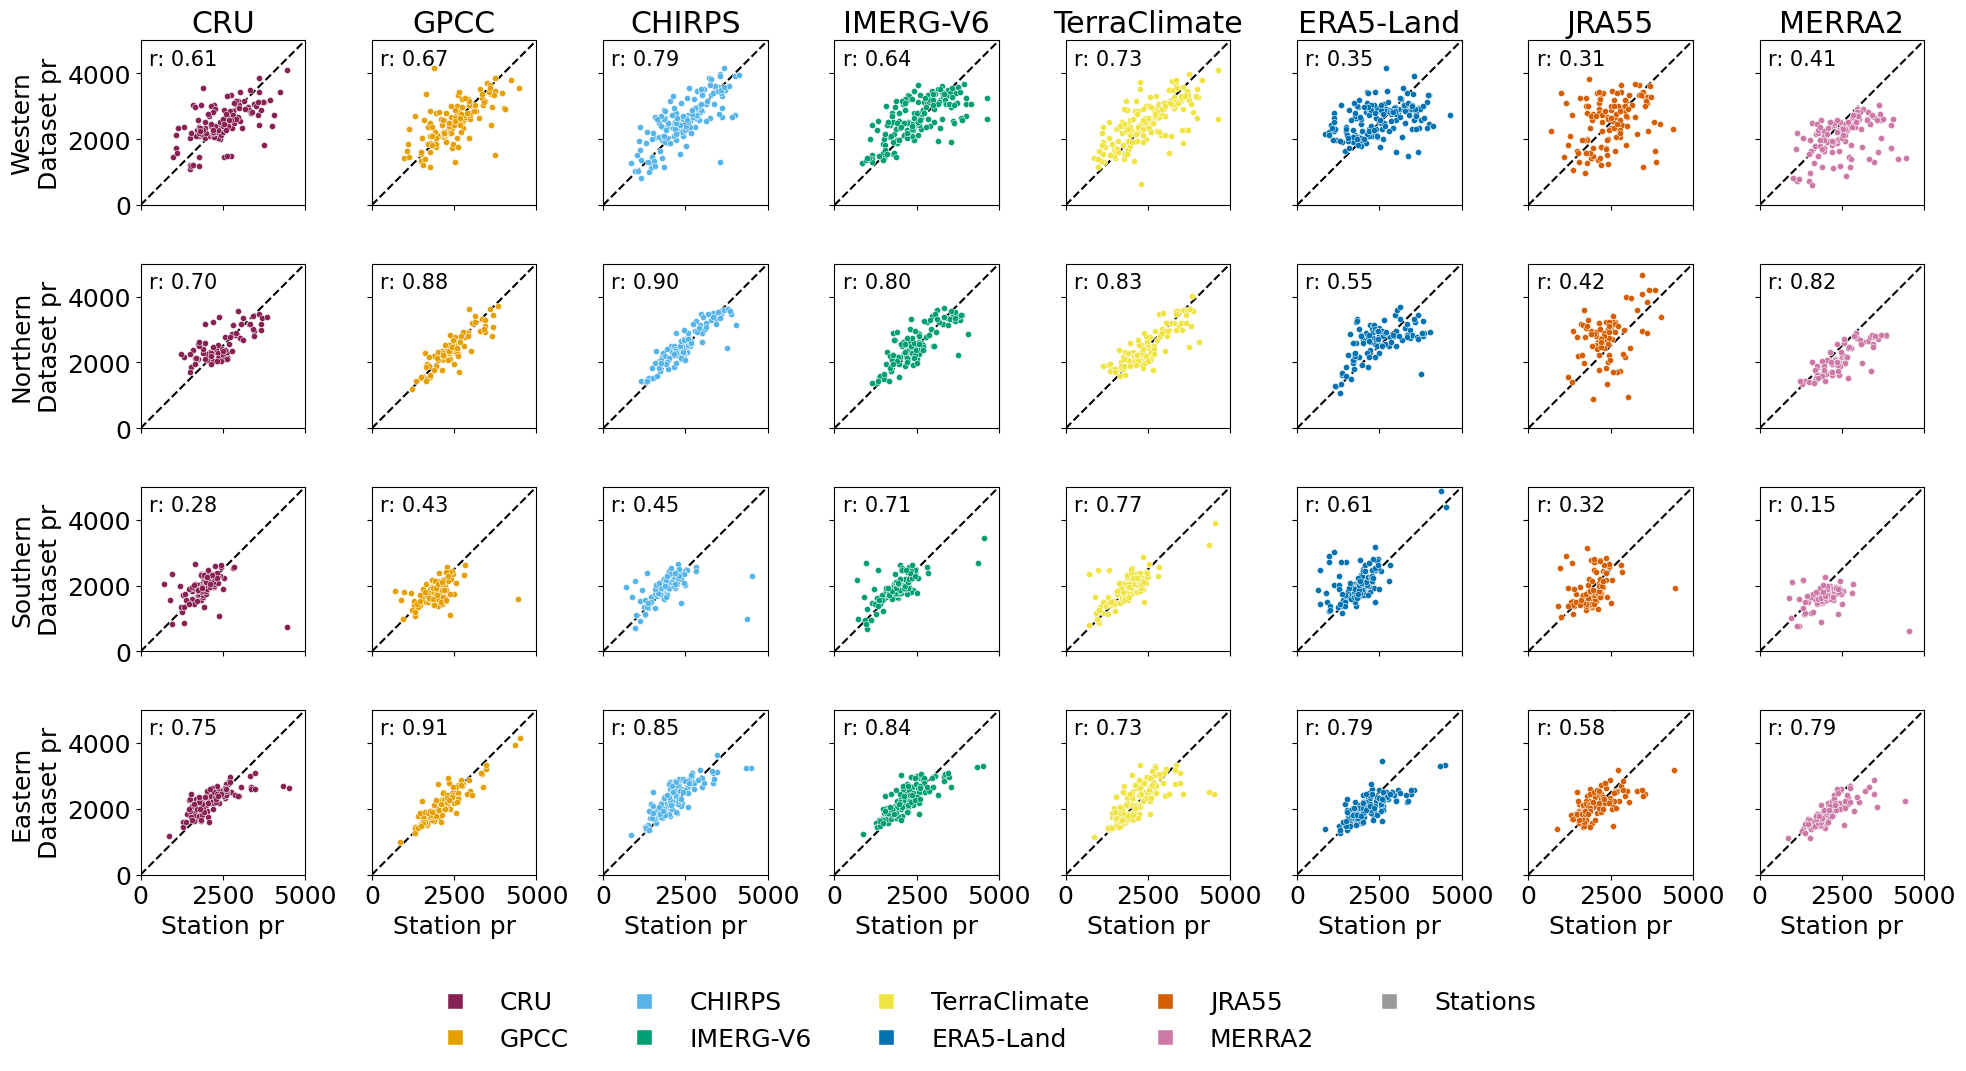

In [27]:
fig, axes = plt.subplots(4,8, figsize=(20,10), sharex=True, sharey=True)
limm = 5000
for i, name in enumerate(datasets_names):
    df_ds = df_compare[df_compare['Dataset'] == name]
    for j, region in enumerate(regions_list):
        df_plot = df_ds[df_ds['Region'] == region]
        sns.scatterplot(data=df_plot,x='stat', y='pr', ax=axes[j,i], s=20, color=wong[i])
        
        axes[j,i].set_xlabel('Station pr')
        axes[j,i].set_ylabel(region + '\nDataset pr')
        axes[j,i].set_xlim(0,limm)
        axes[j,i].set_ylim(0,limm)
        axes[j,i].plot([0,limm],[0,limm], color='black', linestyle='--',zorder=-30)
        axes[j,i].set_aspect('equal', 'box')
        corr = df_plot['stat'].corr(df_plot['pr'])
        axes[j,i].text(0.05, 0.95, f'r: {corr:.2f}', transform=axes[j,i].transAxes, fontsize=15, verticalalignment='top')
    axes[0,i].set_title(name)
    #calculate the Coefficient of determination
    #axes[7].legend(bbox_to_anchor=(0.5, -0.limm), loc='lower center', ncol=3, frameon=False, fontsize=1limm)

    
    
fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.1), loc='lower center', ncol=5, frameon=False)
plt.tight_layout()